In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [46]:
df = pd.read_csv('C:\programowanie\python_mrowa\wdfcs\zad6_dsc_1.txt', sep='\t', header=None, names=['T', 'Q'])
df = df.replace(',', '.', regex=True)
df['T'] = df['T'].astype(float)
df['Q'] = df['Q'].astype(float)
print(df.head())
print(df.dtypes)

        T       Q
0  100.04 -1.0906
1  100.13 -1.0905
2  100.21 -1.0904
3  100.29 -1.0902
4  100.38 -1.0901
T    float64
Q    float64
dtype: object


c:\programowanie\python_mrowa\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\programowanie\python_mrowa\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


                      T
$T_g$        268.100000
$T_{c0}$     310.347008
$T_{c max}$  325.200000
$T_{m0}$     455.855020
0.13626099999999391 40.19626100000005


c:\programowanie\python_mrowa\.venv\lib\site-packages\matplotlib\text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
c:\programowanie\python_mrowa\.venv\lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
c:\programowanie\python_mrowa\.venv\lib\site-packages\matplotlib\text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


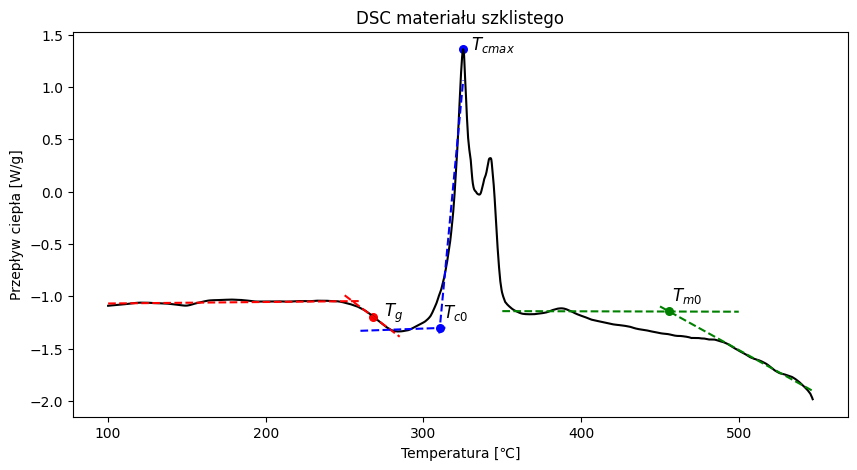

In [99]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df['T'], df['Q'], color='black', linestyle='solid', label='Q(T)')
ax.set_xlabel('Temperatura [℃]')
ax.set_ylabel('Przepływ ciepła [W/g]')
ax.set_title('DSC materiału szklistego')

max_Q_index = df['Q'].idxmax()
T_for_max_Q = df.loc[max_Q_index, 'T']

#1
df_subset1 = df[df['T'] <= 260]
X1 = df_subset1[['T']]
y1 = df_subset1['Q']
reg1 = LinearRegression().fit(X1, y1)
ax.plot(X1, reg1.predict(X1), color='red', linestyle='dashed')

#2
df_subset2 = df[(df['T'] >= 260) & (df['T'] <= 275)]
X2 = df_subset2[['T']]
y2 = df_subset2['Q']
reg2 = LinearRegression().fit(X2, y2)
df_subset22 = df[(df['T'] >= 250) & (df['T'] <= 285)]
X22 = df_subset22[['T']]
ax.plot(X22, reg2.predict(X22), color='red', linestyle='dashed')

#3
df_subset3 = df[(df['T'] >= 275) & (df['T'] <= 297)]
X3 = df_subset3[['T']]
y3 = df_subset3['Q']
reg3 = LinearRegression().fit(X3, y3)
df_subset33 = df[(df['T'] >= 260) & (df['T'] <= 315)]
X33 = df_subset33[['T']]
ax.plot(X33, reg3.predict(X33), color='blue', linestyle='dashed')

#4
df_subset4 = df[(df['T'] >= 310) & (df['T'] <= T_for_max_Q)]
X4 = df_subset4[['T']]
y4 = df_subset4['Q']
reg4 = LinearRegression().fit(X4, y4)
ax.plot(X4, reg4.predict(X4), color='blue', linestyle='dashed')

#5
df_subset5 = df[(df['T'] >= 352) & (df['T'] <= 390)]
X5 = df_subset5[['T']]
y5 = df_subset5['Q']
reg5 = LinearRegression().fit(X5, y5)
df_subset55 = df[(df['T'] >= 350) & (df['T'] <= 500)]
X55 = df_subset55[['T']]
ax.plot(X55, reg5.predict(X55), color='green', linestyle='dashed')

#6
df_subset6 = df[(df['T'] >= 490)]
X6 = df_subset6[['T']]
y6 = df_subset6['Q']
reg6 = LinearRegression().fit(X6, y6)
df_subset6 = df[(df['T'] >= 450)]
X66 = df_subset6[['T']]
ax.plot(X66, reg6.predict(X66), color='green', linestyle='dashed')

# find intersection of blue lines
T_intersection = (reg4.intercept_ - reg3.intercept_) / (reg3.coef_[0] - reg4.coef_[0])
Q_intersection = reg3.predict([[T_intersection]])[0]

# find intersection of green lines
T_intersection2 = (reg6.intercept_ - reg5.intercept_) / (reg5.coef_[0] - reg6.coef_[0])
Q_intersection2 = reg5.predict([[T_intersection]])[0]

# punkty
ax.scatter(268.10, df.loc[df['T']==268.10]['Q'], color='red', marker='o', s=30, label='$T_g$')
ax.annotate('$T_g$', xy=(268.10, df.loc[df['T']==268.10]['Q']), xytext=(275, df.loc[df['T']==268.10]['Q']), fontsize=12)

ax.scatter(T_intersection, Q_intersection, color='blue', marker='o', s=30, label='$T_{c0}$')
ax.annotate('$T_{c0}$', xy=(T_intersection, Q_intersection), xytext=(T_intersection+2, Q_intersection+0.1), fontsize=12)

ax.scatter(T_for_max_Q, df.loc[max_Q_index, 'Q'], color='blue', marker='o', s=30)
ax.annotate('$T_{c max}$', xy=(T_for_max_Q, df.loc[max_Q_index, 'Q']), xytext=(T_for_max_Q+5, df.loc[max_Q_index, 'Q']), fontsize=12)

ax.scatter(T_intersection2, Q_intersection2, color='green', marker='o', s=30, label='$T_{m0}$')
ax.annotate('$T_{m0}$', xy=(T_intersection2, Q_intersection2), xytext=(T_intersection2+2, Q_intersection2+0.1), fontsize=12)

data = pd.DataFrame(index = ['$T_g$','$T_{c0}$', '$T_{c max}$', '$T_{m0}$'], data= {'T': [268.10, T_intersection, T_for_max_Q, T_intersection2]})

print(data)

integral = 0
for index, row in df.iterrows():
    if (row['T'] >= 310 and row['T'] <= 350):
        integral += row['Q'] * (df.iloc[index+1]['T']-row['T'])

integral_plus = 0
for index, row in df.iterrows():
    if (row['T'] >= 310 and row['T'] <= 350):
        integral_plus += (row['Q']+1) * (df.iloc[index+1]['T']-row['T'])

print(integral, integral_plus)
